In [1]:
import pandas as pd
import numpy as np

In [6]:
df = pd.DataFrame({'mode': np.random.choice(['propane', 'ethane', 'decoke', 'hss'], size=20)})

# Create a mask to identify the rows where mode is not 'decoke'
mask = df['mode'] != 'decoke'

# Create a column 'decoke_time' and initialize it with 0
df['decoke_time'] = 0

# Use cumsum to increment the value of 'decoke_time' for subsequent rows where mode is not 'decoke'
df.loc[mask, 'decoke_time'] = np.cumsum(mask & (df['mode'] != df['mode'].shift(1)))

In [7]:
df

,mode,decoke_time
0,ethane,1
1,hss,2
2,hss,2
3,hss,2
4,ethane,3
5,ethane,3
6,propane,4
7,propane,4
8,hss,5
9,propane,6


In [ ]:
import pandas as pd

# Create example dataframe
df = pd.DataFrame({
    'mode': ['ethane', 'propane', 'hss', 'decoke', 'ethane', 'propane', 'propane', 'ethane', 'decoke', 'decoke', 'ethane', 'ethane', 'hss', 'propane', 'propane', 'ethane', 'ethane', 'hss', 'decoke', 'ethane']
})

# Add decoke_time column and calculate values
decoke_time = []
count = 0
for m in df['mode']:
    if m == 'decoke':
        count = 0
    else:
        count += 1
    decoke_time.append(count)
df['decoke_time'] = decoke_time

# Display the dataframe
print(df)

In [ ]:
import pandas as pd

# Create example dataframe
df = pd.DataFrame({
    'mode': ['ethane', 'propane', 'hss', 'decoke', 'ethane', 'propane', 'propane', 'ethane', 'decoke', 'decoke', 'ethane', 'ethane', 'hss', 'propane', 'propane', 'ethane', 'ethane', 'hss', 'decoke', 'ethane']
})

# Add decoke_time column and calculate values
decoke_time = []
count = 0
for m in df['mode']:
    if m == 'decoke':
        count = 0
    else:
        count += 1
    decoke_time.append(count)
df['decoke_time'] = decoke_time

# Display the dataframe
print(df)


In [8]:
import pandas as pd

# Create example dataframe
df = pd.DataFrame({
    'mode': ['ethane', 'propane', 'hss', 'decoke', 'ethane', 'propane', 'propane', 'ethane', 'decoke', 'decoke', 'ethane', 'ethane', 'hss', 'propane', 'propane', 'ethane', 'ethane', 'hss', 'decoke', 'ethane']
})

decoke_time = []
count = 0
found_decoke = False
for m in df['mode']:
    if m == 'decoke':
        count = 0
        found_decoke = True
    else:
        if not found_decoke:
            count = 0
        else:
            count += 1
    decoke_time.append(count)
df['decoke_time'] = decoke_time

# Display the dataframe
print(df)


       mode  decoke_time
0    ethane            0
1   propane            0
2       hss            0
3    decoke            0
4    ethane            1
5   propane            2
6   propane            3
7    ethane            4
8    decoke            0
9    decoke            0
10   ethane            1
11   ethane            2
12      hss            3
13  propane            4
14  propane            5
15   ethane            6
16   ethane            7
17      hss            8
18   decoke            0
19   ethane            1


In [15]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

# Create a simulated dataset
np.random.seed(123)
discrete_time_series = np.random.randint(0, 5, 100)
continuous_time_series = np.random.normal(0, 1, 100)

# Convert the time series to a pandas DataFrame
df = pd.DataFrame({'discrete': discrete_time_series, 'continuous': continuous_time_series})

# Create a lagged version of the DataFrame with the appropriate time lags
lags = 3
df_lagged = pd.concat([df.shift(i) for i in range(lags+1)], axis=1)
df_lagged.columns = ['discrete_t', 'continuous_t', 'discrete_t-1', 'continuous_t-1', 'discrete_t-2', 'continuous_t-2', 'discrete_t-3', 'continuous_t-3']

# Drop the rows with missing values
df_lagged = df_lagged.dropna()

# Split the dataset into a training set and a test set
train_size = int(len(df_lagged) * 0.8)
train = df_lagged[:train_size]
test = df_lagged[train_size:]

# Fit a VAR model to the training set
model = sm.tsa.VAR(train)

# Select the optimal lag order using the Akaike information criterion (AIC)
lag_order = model.select_order(maxlags=lags)

print(lag_order)

# Fit the VAR model with the optimal lag order to the training set
results = model.fit(1)

# Test for Granger causality from the discrete time series to the continuous time series
causality_test = results.test_causality('discrete', 'continuous', kind='f')

# Print the results of the causality test
print(causality_test.summary())


<statsmodels.tsa.vector_ar.var_model.LagOrderResults object. Selected orders are: AIC -> 1, BIC -> 1, FPE -> 1, HQIC -> 1>


/Users/vayu/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ValueError: 'discrete' is not in list

/Users/vayu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: covariance is not positive-semidefinite.
  if __name__ == "__main__":


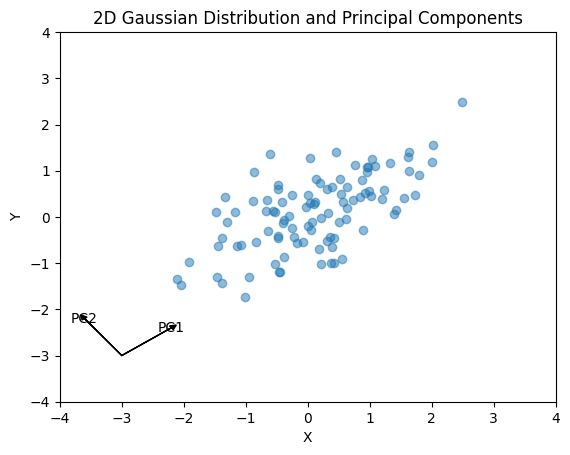

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Step 1: Generate random data from a 2 dimensional Gaussian distribution
np.random.seed(42)
mean = [0, 0]
cov = [[1, 0.5], [1, 1]]
X = np.random.multivariate_normal(mean, cov, 100)

# Step 2: Get the principle components using principle component analysis
pca = PCA(n_components=2)
pca.fit(X)
principal_components = pca.components_

# Step 3: Plot the data and principle components as arrows in a plot
plt.scatter(X[:, 0], X[:, 1], alpha=0.5)
for i, (x, y) in enumerate(principal_components):
    plt.arrow(-3, -3, x, y, head_width=0.1, head_length=0.1, fc='k', ec='k')
    plt.text(x-3, y-3, f"PC{i+1}", ha='center', va='center')
plt.xlim(-4, 4)
plt.ylim(-4, 4)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('2D Gaussian Distribution and Principal Components')
plt.show()

In [17]:
!pip install matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.3/7.3 MB 14.5 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.3/65.3 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.3/98.3 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 965.4/965.4 kB 22.5 MB/s eta 0:00:0000:01


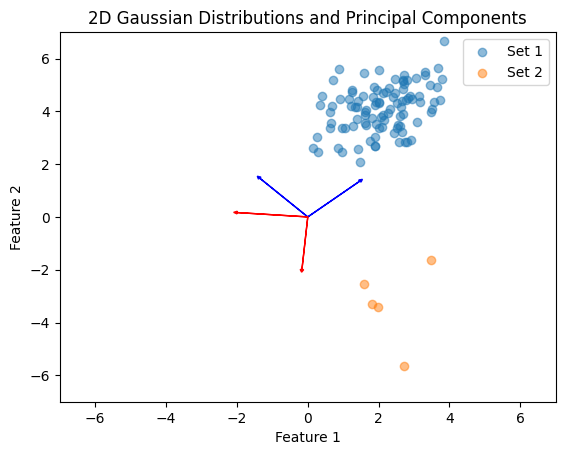

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Step 1: Generate random data from two 2-dimensional Gaussian distributions
np.random.seed(42)
mean1 = [2, 4]
cov1 = [[1, 0.5], [0.5, 1]]
X1 = np.random.multivariate_normal(mean1, cov1, 100)

mean2 = [2, -4]
cov2 = [[1, -0.5], [-0.5, 1]]
X2 = np.random.multivariate_normal(mean2, cov2, 5)

# Step 2: Get the principle components using principle component analysis for both sets
pca1 = PCA(n_components=2)
pca1.fit(X1)
principal_components1 = pca1.components_

pca2 = PCA(n_components=2)
pca2.fit(np.concatenate([X1, X2]))
principal_components2 = pca2.components_

# Step 3: Plot the data and principle components as arrows in a plot
plt.scatter(X1[:, 0], X1[:, 1], alpha=0.5, label='Set 1')
plt.scatter(X2[:, 0], X2[:, 1], alpha=0.5, label='Set 2')

for i, (x, y) in enumerate(principal_components1):
    plt.arrow(0, 0, x*2, y*2, head_width=0.1, head_length=0.1, fc='k', ec='b')
    #plt.text(x, y, f"PC{i+1} (Set 1)", ha='center', va='center')

for i, (x, y) in enumerate(principal_components2):
    plt.arrow(0, 0, x*2, y*2, head_width=0.1, head_length=0.1, fc='r', ec='r')
    #plt.text(x+2, y+2, f"PC{i+1} (Set 2)", ha='center', va='center')

plt.xlim(-7, 7)
plt.ylim(-7, 7)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('2D Gaussian Distributions and Principal Components')
plt.legend()
plt.show()

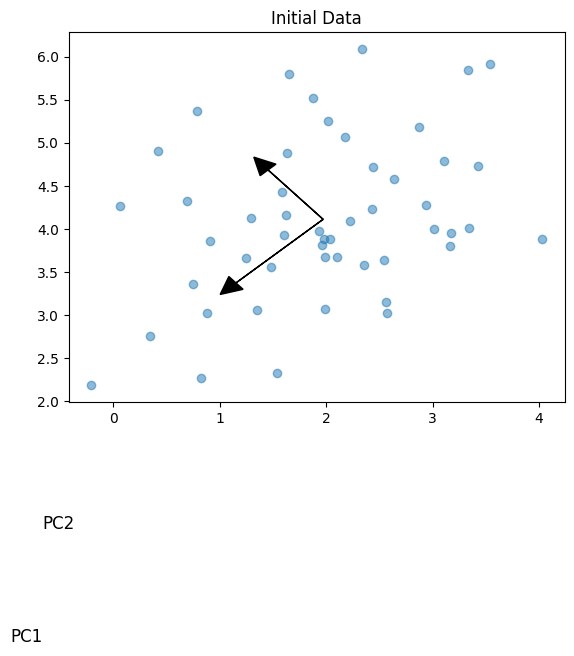

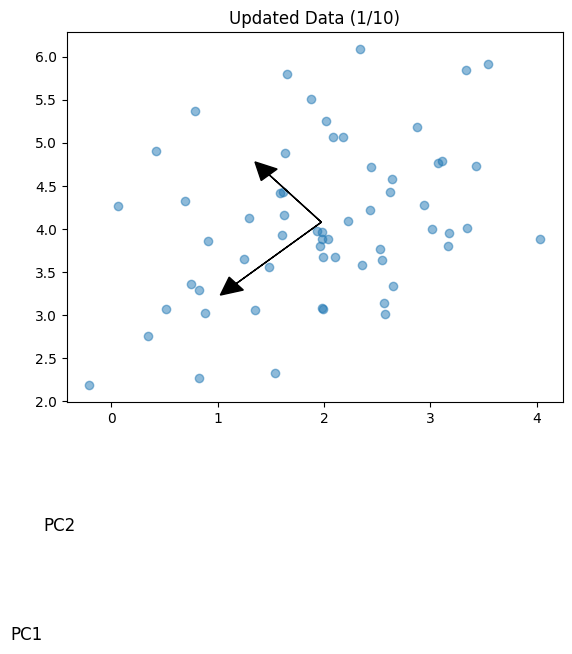

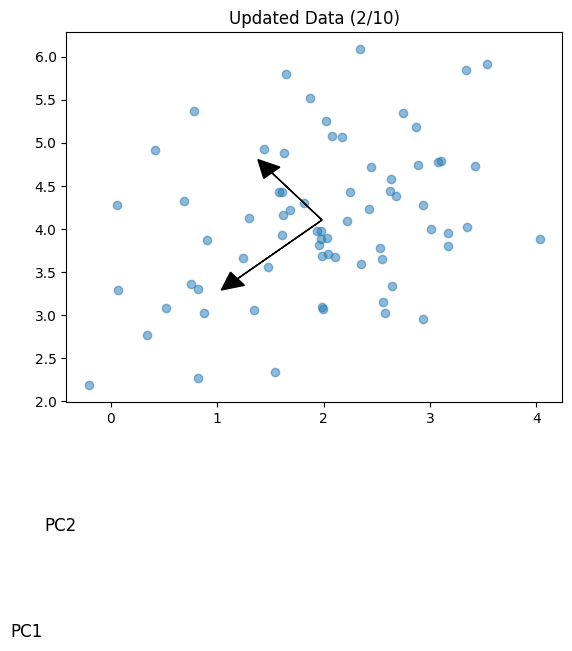

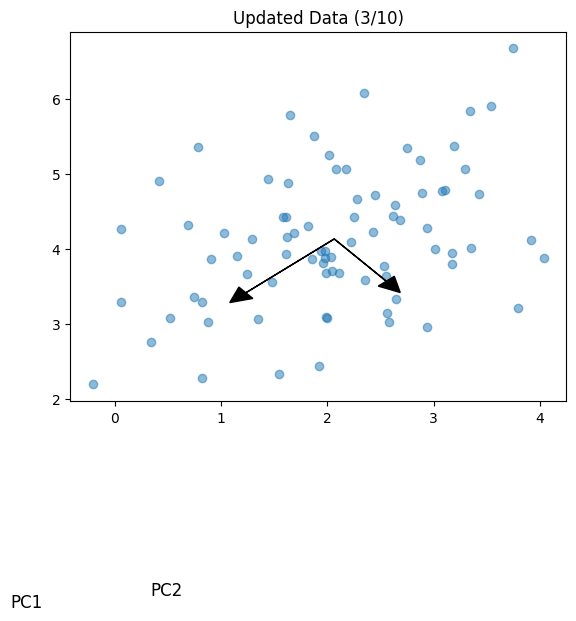

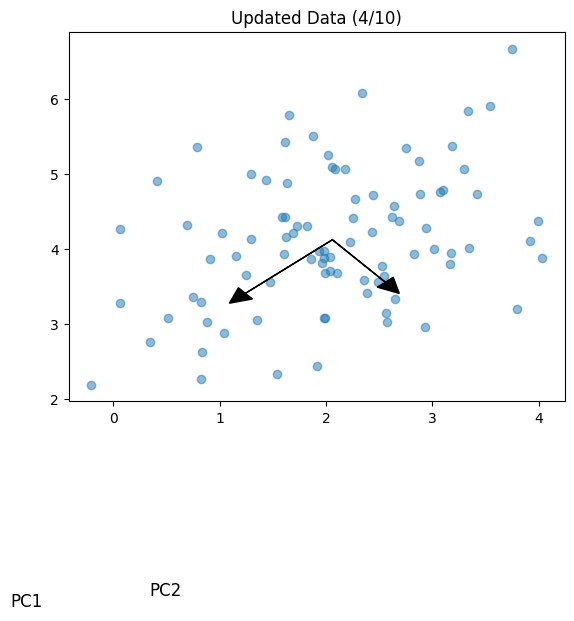

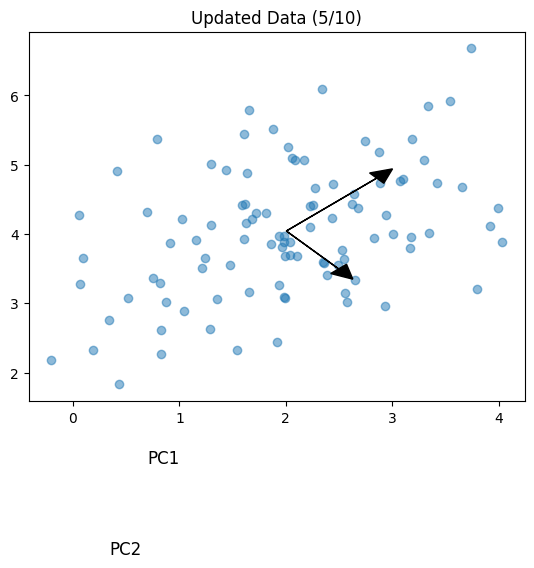

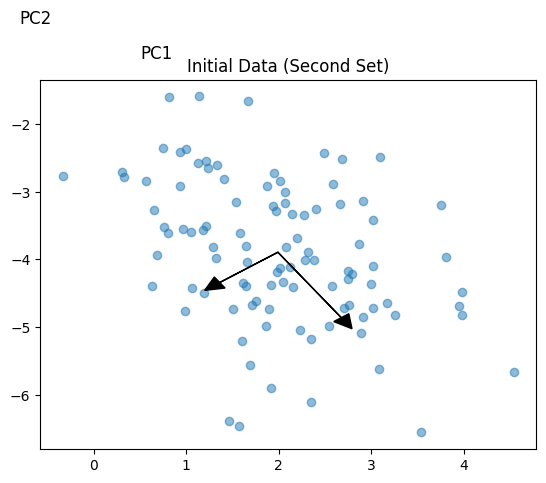

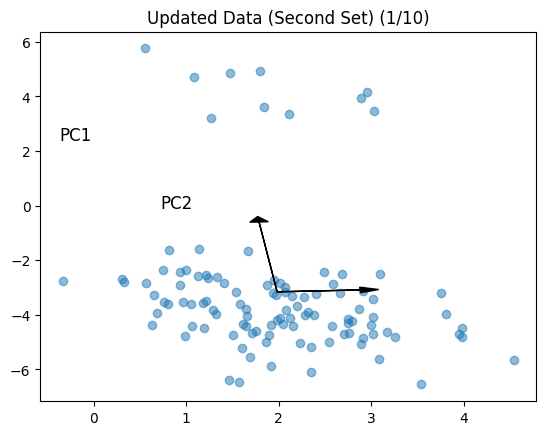

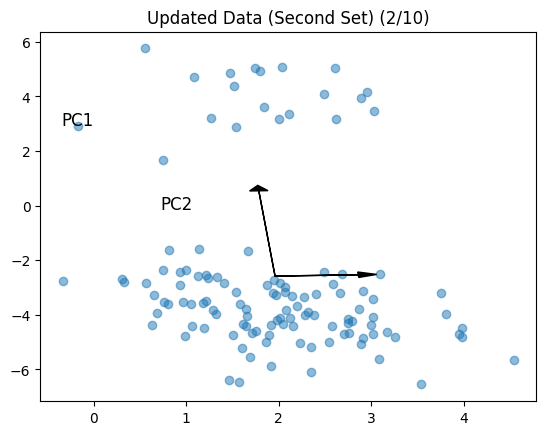

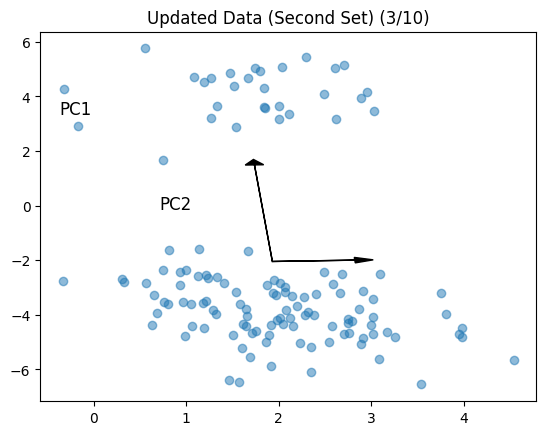

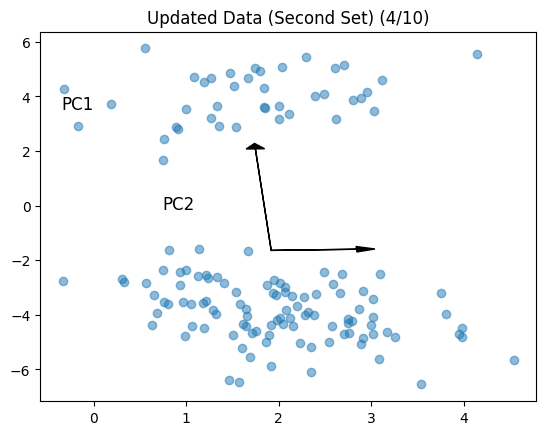

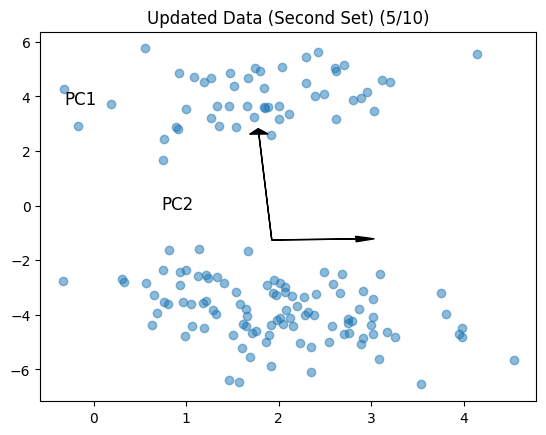

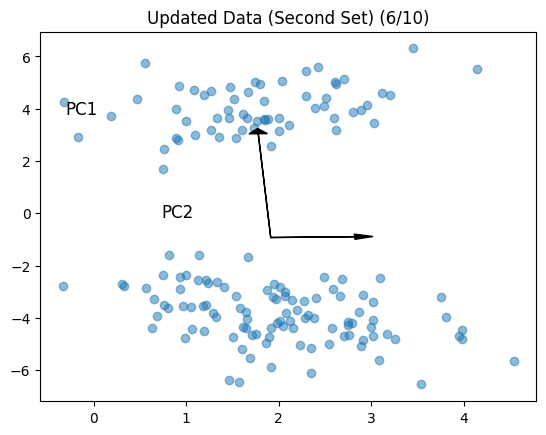

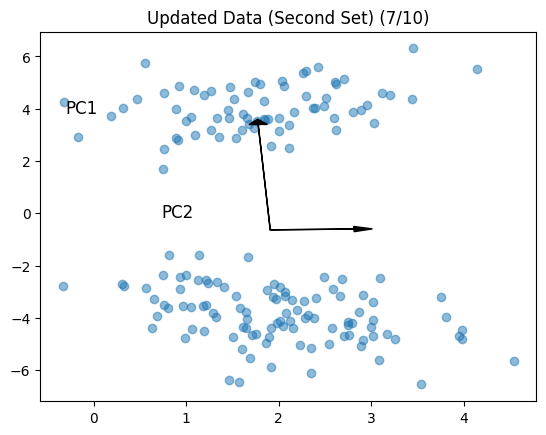

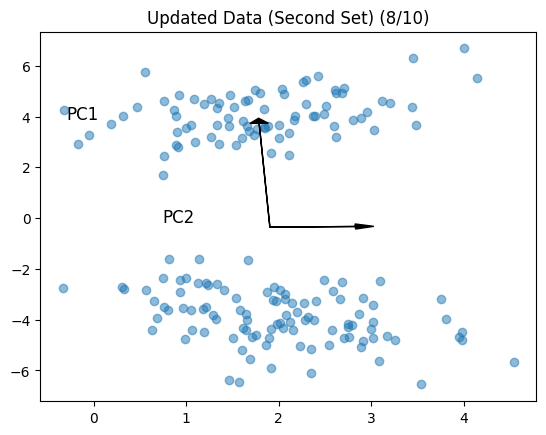

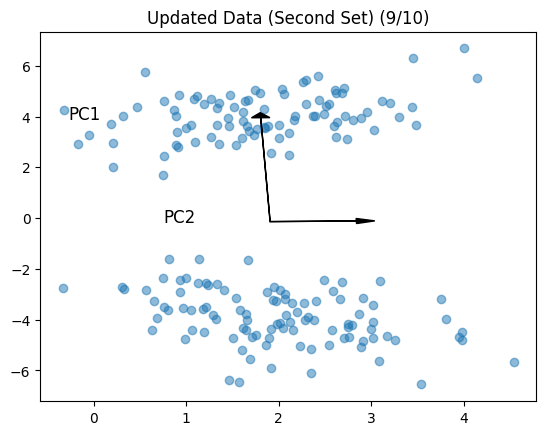

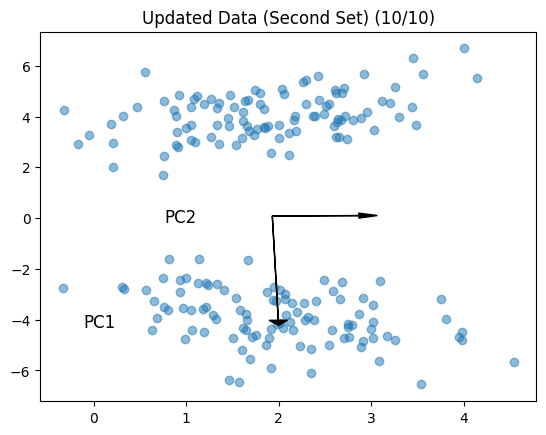

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Define initial data
mean = [2, 4]
cov = [[1, 0.5], [0.5, 1]]
data = np.random.multivariate_normal(mean, cov, 50)

# Perform PCA on initial data
pca = PCA()
pca.fit(data)

# Define function to plot data and arrows
def plot_data_arrows(data, pca, title):
    fig, ax = plt.subplots()

    # Plot data points
    ax.scatter(data[:, 0], data[:, 1], alpha=0.5)

    # Plot arrows
    for i, (comp, var) in enumerate(zip(pca.components_, pca.explained_variance_)):
        comp = comp * np.sqrt(var)
        ax.arrow(pca.mean_[0], pca.mean_[1], comp[0], comp[1], 
                 head_width=0.2, head_length=0.2, fc='k', ec='k')
        ax.text(comp[0], comp[1], f"PC{i+1}", ha='center', va='center', fontsize=12)
    
    ax.set_title(title)
    plt.show()

# Plot initial data and arrows
plot_data_arrows(data, pca, "Initial Data")

# Define function to add new data and update PCA
def update_data_pca(data, pca):
    new_data = np.random.multivariate_normal(mean, cov, 10)
    data = np.concatenate([data, new_data])
    pca.fit(data)
    return data, pca

# Update data and PCA ten times
for i in range(5):
    data, pca = update_data_pca(data, pca)
    plot_data_arrows(data, pca, f"Updated Data ({i+1}/10)")

# Define second set of data
mean2 = [2, -4]
cov2 = [[1, -0.5], [-0.5, 1]]

# Perform PCA on second data set
data2 = np.random.multivariate_normal(mean2, cov2, 100)
pca2 = PCA()
pca2.fit(data2)

# Plot initial data and arrows for second set
plot_data_arrows(data2, pca2, "Initial Data (Second Set)")

# Update second data set and PCA ten times
for i in range(10):
    data2, pca2 = update_data_pca(data2, pca2)
    plot_data_arrows(data2, pca2, f"Updated Data (Second Set) ({i+1}/10)")


In [ ]:
import pandas as pd

# Define the file path and chunk size
file_path = 'path/to/your/file.csv'
chunk_size = 100000

# Define the column substring to match
col_substring = 'TURBINE_EXHAUST_TEMPERATURE'

# Initialize an empty dictionary to store the averages
averages = {}

# Iterate over the file in chunks
for chunk in pd.read_csv(file_path, chunksize=chunk_size):

    # Set the timestamp column as the index
    chunk.set_index('timestamp', inplace=True)

    # Get the column names that match the substring
    temp_cols = [col for col in chunk.columns if col_substring in col]

    # Calculate the average of the values in the columns
    temp_avg = chunk[temp_cols].mean(axis=1)

    # Append the averages to the dictionary
    averages.update(temp_avg)

# Convert the dictionary to a DataFrame
averages_df = pd.DataFrame.from_dict(averages, orient='index', columns=['average'])

# Sort the index
averages_df.sort_index(inplace=True)

# Display the resulting DataFrame
print(averages_df)


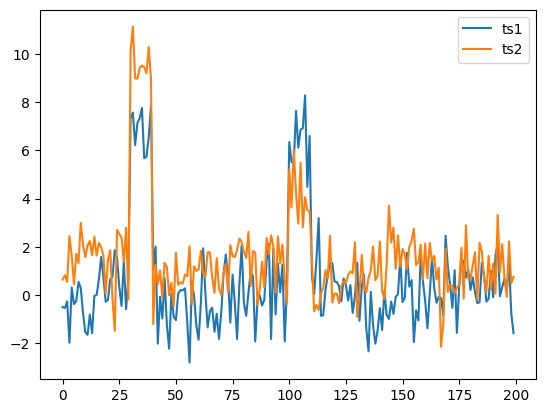

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Generate two time series data each from two different gaussian distribution
ts1 = pd.Series(np.random.normal(0, 1, 200))
ts2 = pd.Series(np.random.normal(1, 1, 200))

# Add data evaluated from a smooth polynomial function to data in Step 1
# x = np.arange(200)
# ts1 += 0.002 * np.polyval([0.2, 0.05, 0.05], x)
# ts2 += 0.002 * np.polyval([0.3, .1, 0.05], x)

# Add data evaluated from a very low frequency sinusoidal function to the data
ts1 += np.sin(np.linspace(0, 5*np.pi, 200))/2
ts2 += np.sin(np.linspace(0, 6*np.pi, 200))/2

# Add constant values to each time series simultaneously for a short duration at regular intervals
ts1[30:40] += 7
ts2[30:40] += 8.5

ts1[100:110] += 6
ts2[100:110] += 4

# Put these columns in a pandas dataframe
df = pd.DataFrame({'ts1': ts1, 'ts2': ts2})

# Plot these series
plt.plot(df['ts1'], label='ts1')
plt.plot(df['ts2'], label='ts2')
plt.legend()
plt.show()

In [4]:
# Define a function to remove outliers using z-score
def remove_outliers(df, column, z_thresh=3):
    # Calculate z-scores
    z_scores = np.abs((df[column] - df[column].mean()) / df[column].std())

    # Filter out rows with z-scores higher than the threshold
    df_no_outliers = df[z_scores < z_thresh]

    return df_no_outliers

# Call the function to remove outliers from column 'A' in the dataframe
df_no_outliers = remove_outliers(df, 'A')

# Print the original and modified dataframes
print("Original DataFrame:")
print(df)
print("\nDataFrame without outliers:")
print(df_no_outliers)

KeyError: 'A'

In [5]:
def remove_outliers(df, column):
    # Calculate the median and IQR
    median = df[column].median()
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1

    # Define the lower and upper bounds
    lower_bound = median - 3 * iqr
    upper_bound = median + 3 * iqr

    # Filter out rows with values outside the bounds
    df_no_outliers = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

    return df_no_outliers

In [6]:
import dash
import dash_core_components as dcc
import dash_html_components as html

# Create a Dash application
app = dash.Dash(__name__)

# Define the layout of the application
app.layout = html.Div(
    children=[
        html.H1('My Dash Application'),
        dcc.Graph(
            id='my-graph',
            figure={
                'data': [{'x': [1, 2, 3], 'y': [4, 1, 2], 'type': 'bar', 'name': 'Example'}],
                'layout': {'title': 'Graph Title'}
            }
        )
    ]
)

# Run the application
app.run_server(mode='inline')

ModuleNotFoundError: No module named 'dash'

In [ ]:
import pandas as pd
import dash
import dash_core_components as dcc
import dash_html_components as html
import plotly.graph_objs as go

# Step 1: Open the Excel sheet and read the columns
df = pd.read_excel('your_file.xlsx', sheet_name='SHEET1')

# Step 2: Extract the desired columns
df_selected = df[['Month', 'Power Commercial Actual', 'Power Commercial Budget', 'Water Commercial Actual', 'Water Commercial Budget']]

# Step 3: Define a Dash app
app = dash.Dash(__name__)

# Define a helper function to filter the dataframe based on the selected data type
def filter_dataframe(selected_data_type):
    if selected_data_type == 'Power':
        return df_selected[['Month', 'Power Commercial Actual', 'Power Commercial Budget']]
    elif selected_data_type == 'Water':
        return df_selected[['Month', 'Water Commercial Actual', 'Water Commercial Budget']]

# Define a callback function for updating the bar chart based on the selected data type and month
@app.callback(
    dash.dependencies.Output('bar-chart', 'figure'),
    [dash.dependencies.Input('data-type-dropdown', 'value'),
     dash.dependencies.Input('month-dropdown', 'value')]
)
def update_bar_chart(selected_data_type, selected_month):
    filtered_df = filter_dataframe(selected_data_type)
    filtered_df = filtered_df[filtered_df['Month'] == selected_month]
    
    # Create the bar chart trace for actual values
    trace1 = go.Bar(
        x=filtered_df['Month'],
        y=filtered_df[selected_data_type + ' Commercial Actual'],
        name=selected_data_type + ' Commercial Actual'
    )

    # Create the bar chart trace for budget values
    trace2 = go.Bar(
        x=filtered_df['Month'],
        y=filtered_df[selected_data_type + ' Commercial Budget'],
        name=selected_data_type + ' Commercial Budget'
    )

    # Combine the traces into data list
    data = [trace1, trace2]

    # Define the layout for the bar chart
    layout = go.Layout(
        title='Commercial Comparison',
        xaxis=dict(title='Month'),
        yaxis=dict(title='Values'),
        barmode='group',
        bargap=0.2,  # Add a gap between the bars
        width=600,  # Set the width of the chart
        height=400  # Set the height of the chart
    )

    # Combine the data and layout into a figure
    fig = go.Figure(data=data, layout=layout)
    
    return fig

# Step 4: Define the layout of the Dash app
app.layout = html.Div([
    html.H1('Test', style={'text-align': 'center'}),
    html.H2('Availability', style={'text-align': 'center'}),
    dcc.Dropdown(
        id='data-type-dropdown',
        options=[
            {'label': 'Power', 'value': 'Power'},
            {'label': 'Water', 'value': 'Water'}
        ],
        value='Power'
    ),
    dcc.Dropdown(
        id='month-dropdown',
        options=[{'label': month, 'value': month} for month in df_selected['Month'].unique()],
        value=df_selected['Month'].iloc[0]
    ),
    dcc.Graph(id='bar-chart')
])

# Step 5: Run the Dash app
if __name__ == '__main__':
    app.run_server(debug=True)


In [ ]:
import pandas as pd
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output

# Step 1: Read the Excel sheet
df = pd.read_excel('REV.xlsx', sheet_name='SHEET1')

# Step 2: Read specific columns
columns = ['Month', 'Power Impact', 'Power Impact YTD', 'Water Impact', 'Water Impact YTD']
df_selected = df[columns]

# Step 3: Create the Dash app
app = dash.Dash(__name__)

# Step 4: Define the app layout
app.layout = html.Div([
    html.H1('Test', style={'text-align': 'center'}),
    html.H2('Availability', style={'text-align': 'center'}),
    html.Div([
        dcc.Dropdown(
            id='data-type-dropdown',
            options=[
                {'label': 'Power', 'value': 'Power'},
                {'label': 'Water', 'value': 'Water'}
            ],
            value='Power'
        ),
        dcc.Dropdown(
            id='month-dropdown',
            options=[{'label': month, 'value': month} for month in df_selected['Month'].unique()],
            value=df_selected['Month'].iloc[0]
        ),
        html.Div(id='selected-values')
    ]),
    dcc.Graph(id='bar-chart')
])

# Step 5: Define the callback function
@app.callback(
    [Output('selected-values', 'children'),
     Output('selected-values', 'style')],
    [Input('data-type-dropdown', 'value'),
     Input('month-dropdown', 'value')]
)
def update_selected_values(data_type, selected_month):
    filtered_df = df_selected[df_selected['Month'] == selected_month]
    
    if data_type == 'Power':
        value1 = filtered_df['Power Impact'].values[0]
        value2 = filtered_df['Power Impact YTD'].values[0]
    else:
        value1 = filtered_df['Water Impact'].values[0]
        value2 = filtered_df['Water Impact YTD'].values[0]
    
    style = {'color': 'green' if value1 >= 0 else 'red'}
    selected_values = html.H3(f'Value 1: {value1}', style=style)
    
    style2 = {'color': 'green' if value2 >= 0 else 'red'}
    selected_values2 = html.H3(f'Value 2: {value2}', style=style2)
    
    return [selected_values, selected_values2], {'display': 'inline-block', 'margin-left': '20px'}

# Step 6: Run the app
if __name__ == '__main__':
    app.run_server(debug=True)


In [ ]:
import pandas as pd
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output

# Step 1: Read the Excel sheet
df = pd.read_excel('REV.xlsx', sheet_name='SHEET1')

# Step 2: Read specific columns
columns = ['Month', 'Power Impact', 'Power Impact YTD', 'Water Impact', 'Water Impact YTD']
df_selected = df[columns]

# Step 3: Create the Dash app
app = dash.Dash(__name__)

# Step 4: Define the app layout
app.layout = html.Div([
    html.H1('Test'),
    html.H2('Availability'),
    html.Div([
        html.Div([
            html.Label('Data Type:'),
            dcc.Dropdown(
                id='data-type-dropdown',
                options=[
                    {'label': 'Power', 'value': 'Power'},
                    {'label': 'Water', 'value': 'Water'}
                ],
                value='Power'
            )
        ], style={'display': 'inline-block', 'width': '50%'}),
        html.Div([
            html.Label('Month:'),
            dcc.Dropdown(
                id='month-dropdown',
                options=[{'label': month, 'value': month} for month in df_selected['Month'].unique()],
                value=df_selected['Month'].iloc[0]
            )
        ], style={'display': 'inline-block', 'width': '50%'})
    ]),
    html.Div(id='selected-values')
])

# Step 5: Define the callback function
@app.callback(
    Output('selected-values', 'children'),
    [Input('data-type-dropdown', 'value'),
     Input('month-dropdown', 'value')]
)
def update_selected_values(data_type, selected_month):
    filtered_df = df_selected[df_selected['Month'] == selected_month]
    
    if data_type == 'Power':
        value1 = filtered_df['Power Impact'].values[0]
        value2 = filtered_df['Power Impact YTD'].values[0]
    else:
        value1 = filtered_df['Water Impact'].values[0]
        value2 = filtered_df['Water Impact YTD'].values[0]
    
    return html.Div([
        html.H3(f'Value 1: {value1}'),
        html.H3(f'Value 2: {value2}')
    ])

# Step 6: Run the app
if __name__ == '__main__':
    app.run_server(debug=True)


In [ ]:
html.Div(
    style={'display': 'grid', 'grid-template-columns': '1fr 1fr', 'grid-template-rows': '1fr 1fr'},
    children=[
        html.H3('Value 1:', style={'font-family': 'Roboto Thin'}),
        html.H3('Value 2:', style={'font-family': 'Roboto Thin'}),
        html.H3('Value 3:', style={'font-family': 'Roboto Thin'}),
        html.H3('Value 4:', style={'font-family': 'Roboto Thin'})
    ]
)


In [ ]:
import pandas as pd
import dash
import dash_core_components as dcc
import dash_html_components as html
import plotly.graph_objects as go

# Step 1: Read Excel sheet
df = pd.read_excel('REV.xlsx', sheet_name='SHEET1')

app = dash.Dash(__name__)

app.layout = html.Div(children=[
    html.H1('Power and Water Impact'),
    dcc.Dropdown(
        id='data-dropdown',
        options=[
            {'label': 'Power', 'value': 'power'},
            {'label': 'Water', 'value': 'water'}
        ],
        value='power'
    ),
    dcc.Graph(id='impact-bar-chart')
])

@app.callback(
    dash.dependencies.Output('impact-bar-chart', 'figure'),
    [dash.dependencies.Input('data-dropdown', 'value')]
)
def update_chart(selected_data):
    # Filter data based on selected dropdown value
    if selected_data == 'power':
        data = df[['Month', 'Power Impact', 'Power Impact YTD']]
        title = 'Power Impact'
    elif selected_data == 'water':
        data = df[['Month', 'Water Impact', 'Water Impact YTD']]
        title = 'Water Impact'

    # Create bar chart
    fig = go.Figure()
    fig.add_trace(go.Bar(x=data['Month'], y=data[title], name=title))

    fig.update_layout(
        title=title,
        xaxis_title='Month',
        yaxis_title='Impact'
    )

    return fig

if __name__ == '__main__':
    app.run_server(debug=True)


In [ ]:

To center the dropdown in the Dash dashboard, you can add a CSS style to the HTML Div element containing the dropdown. Here's an updated version of the code with the centered dropdown:

python
Copy code
import pandas as pd
import dash
import dash_core_components as dcc
import dash_html_components as html
import plotly.graph_objects as go

# Step 1: Read Excel sheet
df = pd.read_excel('REV.xlsx', sheet_name='SHEET1')

app = dash.Dash(__name__)

app.layout = html.Div(
    style={'display': 'flex', 'justify-content': 'center'},
    children=[
        html.H1('Power and Water Impact'),
        html.Div(
            style={'width': '50%'},
            children=[
                dcc.Dropdown(
                    id='data-dropdown',
                    options=[
                        {'label': 'Power', 'value': 'power'},
                        {'label': 'Water', 'value': 'water'}
                    ],
                    value='power'
                )
            ]
        ),
        dcc.Graph(id='impact-bar-chart')
    ]
)

In [ ]:
import pandas as pd
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
import string

# Step 1: Convert texts to lower case
df['text'] = df['text'].str.lower()

# Step 2: Remove punctuation and special characters
df['text'] = df['text'].str.translate(str.maketrans('', '', string.punctuation))

# Step 3: Eliminate stop words
nlp = spacy.load('en_core_web_sm')
df['text'] = df['text'].apply(lambda x: ' '.join([token.text for token in nlp(x) if token.text not in STOP_WORDS]))

# Step 4: Remove any numerical data
df['text'] = df['text'].str.replace('\d+', '')

# Step 5: Return the processed text in a new DataFrame
processed_df = pd.DataFrame({'processed_text': df['text']})

# Step 6: Apply the 'tokenize' function on each row of the processed DataFrame
processed_df['tokens'] = processed_df['processed_text'].apply(tokenize)


In [ ]:
import spacy

# Load the English language model
nlp = spacy.load('en_core_web_sm')

# Example statement
statement = "I couldn't attend the meeting because I was sick."

# Apply dependency parsing
doc = nlp(statement)

# Find the main verb
main_verb = [token for token in doc if token.head == token][0]

# Traverse dependencies to find reason clause
reason_clause = [token.text for token in main_verb.subtree if token.dep_ == 'mark']

# Print the reason clause
print("Reason Clause:", ' '.join(reason_clause))


In [ ]:
import spacy

# Load the English language model
nlp = spacy.load('en_core_web_sm')

# Example statement
statement = "Non availability due to shortage of steam."

# Apply dependency parsing
doc = nlp(statement)

# Find the main verb
main_verb = [token for token in doc if token.pos_ == 'VERB'][0]

# Traverse dependencies to find reason clause
reason_clause = []
for token in main_verb.lefts:
    if token.dep_ == 'prep' and token.head == main_verb and token.text == 'due to':
        reason_clause = [child.text for child in token.subtree]
        break

# Print the reason clause
print("Reason Clause:", ' '.join(reason_clause))


In [1]:
import spacy
# Load the English language model
nlp = spacy.load('en_core_web_sm')

# Example sentence
sentence = "I couldn't attend the meeting because I was sick."

# Apply dependency parsing
doc = nlp(sentence)

# Find the main verb
main_verb = [token for token in doc if token.head == token][0]

# Traverse dependencies to find reason clause
reason_clause = []
for token in main_verb.children:
    if token.dep_ == 'mark' and token.text.lower() in ['because', 'since', 'as']:
        reason_clause = [child.text for child in token.subtree]
        break

# Print the reason clause
print("Reason Clause:", ' '.join(reason_clause))

Reason Clause: 


In [3]:
import sys

# Print Python version
print(sys.version)

3.7.1 (default, Dec 14 2018, 13:28:58) 
[Clang 4.0.1 (tags/RELEASE_401/final)]


In [4]:
!pip install spacy

In [2]:
import spacy
from spacy import displacy

# Load the English language model
nlp = spacy.load('en_core_web_sm')

# Example statement
statement = "Non availability due to shortage of steam."

# Apply dependency parsing
doc = nlp(statement)

# Print the dependency tree
displacy.render(doc, style='dep', options={'compact': True})


In [8]:
# Load the English language model
nlp = spacy.load('en_core_web_sm')

# Example statement
statement = "Non availability due to shortage of steam."

# Apply dependency parsing
doc = nlp(statement)

# Find the main verb
main_verb = [token for token in doc if token.pos_ == 'VERB'][0]
print(main_verb)

# Traverse dependencies to find reason clause
reason_clause = []
for token in main_verb.lefts:
    if token.dep_ == 'prep' and token.head == main_verb and token.text == 'due to':
        reason_clause = [child.text for child in token.subtree]
        break

# Print the reason clause
print("Reason Clause:", ' '.join(reason_clause))

IndexError: list index out of range

In [7]:
main_verb

attend

In [9]:
import pandas as pd
import spacy

# Load the English language model
nlp = spacy.load("en_core_web_sm")

# Create a dataframe with sentences as columns
data = {
    'sentence_1': ["The printer is not working properly.", "The computer keeps crashing."],
    'sentence_2': ["The camera lens is cracked.", "The server is down."]
}

df = pd.DataFrame(data)

# Function to remove equipment names from sentences
def remove_equipment_names(sentence):
    doc = nlp(sentence)
    tokens = []
    for token in doc:
        if token.ent_type_ != "PRODUCT":
            tokens.append(token.text)
    return " ".join(tokens)

# Apply the remove_equipment_names() function to each column
processed_df = df.applymap(remove_equipment_names)

# Print the processed dataframe
print(processed_df)


                              sentence_1                    sentence_2
0  The printer is not working properly .  The camera lens is cracked .
1          The computer keeps crashing .          The server is down .


In [10]:
processed_df

,sentence_1,sentence_2
0,The printer is not working properly .,The camera lens is cracked .
1,The computer keeps crashing .,The server is down .


In [3]:
import nltk
from nltk.collocations import BigramCollocationFinder
from nltk.metrics import BigramAssocMeasures

# Example text
text = "The quick brown fox jumps over the lazy dog. The lazy dog barks at the moon."

# Tokenize the text into words
tokens = nltk.word_tokenize(text)

# Create a finder for bigram collocations
finder = BigramCollocationFinder.from_words(tokens)

# Set the scoring metric for collocations
scoring_metric = BigramAssocMeasures.likelihood_ratio

# Extract the top N collocations
top_collocations = finder.nbest(scoring_metric, 5)

# Print the extracted collocations
for collocation in top_collocations:
    print(" ".join(collocation))


lazy dog
barks at
brown fox
fox jumps
jumps over


In [4]:
import nltk
from nltk import FreqDist

# Example text
text = "The quick brown fox jumps over the lazy dog. The lazy dog barks at the moon."

# Tokenize the text into words
tokens = nltk.word_tokenize(text)

# Count the frequency of tokens
freq_counter = FreqDist(tokens)

# Set the threshold for low-frequency tokens
frequency_threshold = 2

# Filter for low-frequency tokens
filtered_tokens = [token for token in tokens if freq_counter[token] >= frequency_threshold]

# Print the filtered tokens
print(filtered_tokens)


['The', 'the', 'lazy', 'dog', '.', 'The', 'lazy', 'dog', 'the', '.']


In [12]:
!pip install nltk

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 7.3 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 8.6 MB/s eta 0:00:00


In [2]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /Users/vayu/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
import nltk
from nltk import bigrams

# Example text
text = "The quick brown fox jumps over the lazy dog. The lazy dog barks at the moon."

# Tokenize the text into words
tokens = nltk.word_tokenize(text)

# Perform POS tagging
pos_tags = nltk.pos_tag(tokens)

# Generate bigrams
bigram_pairs = bigrams(pos_tags)

# Select adjective-noun and noun-verb combinations
selected_bigrams = [(w1, w2) for (w1, t1), (w2, t2) in bigram_pairs if (t1.startswith('JJ') and t2.startswith('NN')) or (t1.startswith('NN') and t2.startswith('VB'))]

# Print the selected bigrams
for bigram in selected_bigrams:
    print(bigram)


In [8]:
import nltk
from nltk import bigrams
import pandas as pd

# Step 1: Create a dataframe with statements in the "comments" column
df = pd.DataFrame({
    'comments': [
        'The quick brown fox jumps over the lazy dog.',
        'The lazy dog barks at the moon.',
        'The brown cat sleeps on the mat.'
    ]
})

# Step 2: Select adjective-noun and noun-verb combinations in bigrams
df['adjective_noun'] = df['comments'].apply(lambda x: [' '.join(bigram) for bigram in bigrams(nltk.pos_tag(nltk.word_tokenize(x))) if bigram[0][1].startswith('JJ') and bigram[1][1].startswith('NN')])
df['noun_verb'] = df['comments'].apply(lambda x: [' '.join(bigram) for bigram in bigrams(nltk.pos_tag(nltk.word_tokenize(x))) if bigram[0][1].startswith('NN') and bigram[1][1].startswith('VB')])

# Print the dataframe
print(df)

TypeError: sequence item 0: expected str instance, tuple found

In [6]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/vayu/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [10]:
import nltk
from nltk import bigrams
import pandas as pd

# Step 1: Create a dataframe with statements in the "comments" column
df = pd.DataFrame({
    'comments': [
        'The quick brown fox jumps over the lazy dog.',
        'The lazy dog barks at the moon.',
        'The brown cat sleeps on the mat.'
    ]
})

# Step 2: Select adjective-noun and noun-verb combinations in bigrams
df['adjective_noun'] = df['comments'].apply(lambda x: [' '.join(bigram) for bigram in bigrams(nltk.pos_tag(nltk.word_tokenize(x))) if bigram[0][1].startswith('JJ') and bigram[1][1].startswith('NN')])

df['noun_verb'] = df['comments'].apply(lambda x: [' '.join(bigram) for bigram in bigrams(nltk.pos_tag(nltk.word_tokenize(x))) if bigram[0][1].startswith('NN') and bigram[1][1].startswith('VB')])

# Print the dataframe
print(df)


TypeError: sequence item 0: expected str instance, tuple found

In [13]:
import nltk
from nltk import bigrams
import pandas as pd

# Step 1: Create a dataframe with statements in the "comments" column
df = pd.DataFrame({
    'comments': [
        'The quick brown fox jumps over the lazy dog.',
        'The lazy dog barks at the moon.',
        'The brown cat sleeps on the mat.'
    ]
})

# Step 2: Select adjective-noun and noun-verb combinations in bigrams
df['adjective_noun'] = df['comments'].apply(lambda x: [' '.join(bigram) for bigram in bigrams(nltk.pos_tag(nltk.word_tokenize(x))) if bigram[0][1].startswith('JJ') and bigram[1][1].startswith('NN')])

df['noun_verb'] = df['comments'].apply(lambda x: [' '.join(bigram) for bigram in bigrams(nltk.pos_tag(nltk.word_tokenize(x))) if bigram[0][1].startswith('NN') and bigram[1][1].startswith('VB')])

# Convert empty lists to None
df['adjective_noun'] = df['adjective_noun'].apply(lambda x: None if len(x) == 0 else x)
df['noun_verb'] = df['noun_verb'].apply(lambda x: None if len(x) == 0 else x)

# Print the dataframe
print(df)


TypeError: sequence item 0: expected str instance, tuple found

In [14]:
import nltk
from nltk import bigrams
import pandas as pd

# Step 1: Create a dataframe with statements in the "comments" column
df = pd.DataFrame({
    'comments': [
        'The quick brown fox jumps over the lazy dog.',
        'The lazy dog barks at the moon.',
        'The brown cat sleeps on the mat.'
    ]
})

# Step 2: Select adjective-noun and noun-verb combinations in bigrams
df['adjective_noun'] = df['comments'].apply(lambda x: [' '.join(word for word, pos in bigram) for bigram in bigrams(nltk.pos_tag(nltk.word_tokenize(x))) if bigram[0][1].startswith('JJ') and bigram[1][1].startswith('NN')])

df['noun_verb'] = df['comments'].apply(lambda x: [' '.join(word for word, pos in bigram) for bigram in bigrams(nltk.pos_tag(nltk.word_tokenize(x))) if bigram[0][1].startswith('NN') and bigram[1][1].startswith('VB')])

# Print the dataframe
print(df)


                                       comments           adjective_noun  \
0  The quick brown fox jumps over the lazy dog.  [quick brown, lazy dog]   
1               The lazy dog barks at the moon.               [lazy dog]   
2              The brown cat sleeps on the mat.              [brown cat]   

     noun_verb  
0  [fox jumps]  
1           []  
2           []  


In [15]:
import nltk
from nltk import bigrams
import pandas as pd

# Step 1: Create a dataframe with statements in the "comments" column
df = pd.DataFrame({
    'comments': [
        'The quick brown fox jumps over the lazy dog.',
        'The lazy dog barks at the moon.',
        'The brown cat sleeps on the mat.'
    ]
})

# Step 2: Select adjective-noun and noun-verb combinations in bigrams
df['adjective_noun'] = df['comments'].apply(lambda x: [' '.join(word for word, pos in bigram) for bigram in bigrams(nltk.pos_tag(nltk.word_tokenize(x))) if pos.startswith('JJ') and (nltk.pos_tag([word])[0][1].startswith('NN'))])

df['noun_verb'] = df['comments'].apply(lambda x: [' '.join(word for word, pos in bigram) for bigram in bigrams(nltk.pos_tag(nltk.word_tokenize(x))) if pos.startswith('NN') and (nltk.pos_tag([word])[0][1].startswith('VB'))])

# Print the dataframe
print(df)


NameError: name 'pos' is not defined

In [16]:
import nltk
from nltk import bigrams
import pandas as pd

# Step 1: Create a dataframe with statements in the "comments" column
df = pd.DataFrame({
    'comments': [
        'The quick brown fox jumps over the lazy dog.',
        'The lazy dog barks at the moon.',
        'The brown cat sleeps on the mat.'
    ]
})

# Step 2: Select adjective-noun and noun-verb combinations in bigrams
df['adjective_noun'] = df['comments'].apply(lambda x: [' '.join(word for word, pos in bigram) for bigram in bigrams(nltk.pos_tag(nltk.word_tokenize(x))) if pos.startswith('JJ') and nltk.pos_tag([word])[0][1].startswith('NN')])

df['noun_verb'] = df['comments'].apply(lambda x: [' '.join(word for word, pos in bigram) for bigram in bigrams(nltk.pos_tag(nltk.word_tokenize(x))) if pos.startswith('NN') and nltk.pos_tag([word])[0][1].startswith('VB')])

# Print the dataframe
print(df)


NameError: name 'pos' is not defined

In [17]:
import nltk
from nltk import bigrams
import pandas as pd

# Step 1: Create a dataframe with statements in the "comments" column
df = pd.DataFrame({
    'comments': [
        'The quick brown fox jumps over the lazy dog.',
        'The lazy dog barks at the moon.',
        'The brown cat sleeps on the mat.'
    ]
})

# Step 2: Select adjective-noun and noun-verb combinations in bigrams
df['adjective_noun'] = df['comments'].apply(lambda x: [' '.join((word, pos)) for word, pos in bigrams(nltk.pos_tag(nltk.word_tokenize(x))) if pos.startswith('JJ') and nltk.pos_tag([word])[0][1].startswith('NN')])

df['noun_verb'] = df['comments'].apply(lambda x: [' '.join((word, pos)) for word, pos in bigrams(nltk.pos_tag(nltk.word_tokenize(x))) if pos.startswith('NN') and nltk.pos_tag([word])[0][1].startswith('VB')])

# Strip the POS tags from the extracted combinations
df['adjective_noun'] = df['adjective_noun'].apply(lambda x: [word for word, _ in x])
df['noun_verb'] = df['noun_verb'].apply(lambda x: [word for word, _ in x])

# Print the dataframe
print(df)


AttributeError: 'tuple' object has no attribute 'startswith'

In [19]:
import nltk
from nltk import bigrams
import pandas as pd

# Step 1: Create a dataframe with statements in the "comments" column
df = pd.DataFrame({
    'comments': [
        'The quick brown fox jumps over the lazy dog.',
        'The lazy dog barks at the moon.',
        'The brown cat sleeps on the mat.'
    ]
})

# Step 2: Select adjective-noun and noun-verb combinations in bigrams
df['adjective_noun'] = df['comments'].apply(lambda x: [' '.join(bigram) for bigram in bigrams(nltk.word_tokenize(x)) if nltk.pos_tag(bigram)[1][1].startswith('JJ') and nltk.pos_tag(bigram)[0][1].startswith('NN')])

df['noun_verb'] = df['comments'].apply(lambda x: [' '.join(bigram) for bigram in bigrams(nltk.word_tokenize(x)) if nltk.pos_tag(bigram)[1][1].startswith('VB') and nltk.pos_tag(bigram)[0][1].startswith('NN')])

# Print the dataframe
print(df)



                                       comments adjective_noun noun_verb
0  The quick brown fox jumps over the lazy dog.             []        []
1               The lazy dog barks at the moon.             []        []
2              The brown cat sleeps on the mat.             []        []


In [20]:
import pandas as pd

# Step 1: Read the Excel sheet into a DataFrame
df = pd.read_excel('your_file.xlsx', usecols=['Start Date', 'End Date', 'Unit', 'Forced Outage Hours', 'Reason'])

# Step 2: Fill empty end dates with start date + forced outage hours
df['End Date'] = df.apply(lambda row: row['Start Date'] + pd.DateOffset(hours=row['Forced Outage Hours']) if pd.isnull(row['End Date']) else row['End Date'], axis=1)

# Step 3: Remove special characters from the unit column
df['Unit'] = df['Unit'].str.replace(r'[^A-Za-z0-9]+', '')

# Print the updated DataFrame
print(df)

# Step 4: Count the number of occurrences of each unit
unit_counts = df['Unit'].value_counts()

# Step 5: Calculate the time elapsed as difference between end date of a row and start date of the previous row within each unit group
df['Prev End Date'] = df.groupby('Unit')['End Date'].shift()
df['Time Elapsed'] = df['Start Date'] - df['Prev End Date']


FileNotFoundError: [Errno 2] No such file or directory: 'your_file.xlsx'

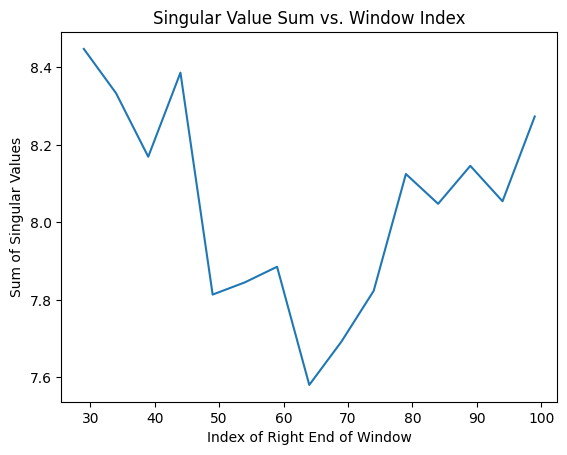

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.linalg import svd
from multiprocessing import Pool

# Create a sample dataframe
df = pd.DataFrame(np.random.rand(100, 3), columns=['A', 'B', 'C'])

window_length = 30
stride = 5

def process_window(window):
    _, singular_values, _ = svd(window)
    return np.sum(singular_values)

def process_window_parallel(window):
    with Pool() as pool:
        result = pool.map(process_window, window)
    return result

# Generate the list of windows
windows = [df.iloc[i:i+window_length, :] for i in range(0, len(df) - window_length + 1, stride)]

# Process the windows in parallel
S = process_window_parallel(windows)

# Plot the values of S
plt.plot(range(window_length-1, len(df), stride), S)
plt.xlabel('Index of Right End of Window')
plt.ylabel('Sum of Singular Values')
plt.title('Singular Value Sum vs. Window Index')
plt.show()

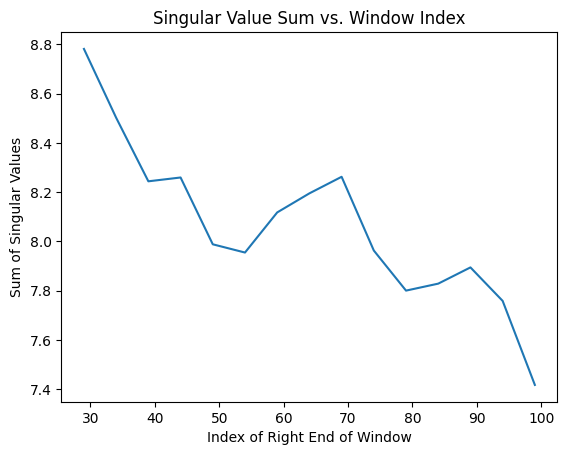

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.linalg import svd
from multiprocessing import Pool

# Create a sample dataframe
df = pd.DataFrame(np.random.rand(100, 3), columns=['A', 'B', 'C'])

window_length = 30
stride = 5

def process_window(window):
    _, singular_values, _ = svd(window)
    return np.sum(singular_values)

def process_window_parallel(window):
    with Pool() as pool:
        result = pool.map(process_window, window)
    return result

# Generate the list of windows
windows = [df.iloc[i:i+window_length, :] for i in range(0, len(df) - window_length + 1, stride)]

# Process the windows in parallel
S = process_window_parallel(windows)

# Plot the values of S
plt.plot(range(window_length-1, len(df), stride), S)
plt.xlabel('Index of Right End of Window')
plt.ylabel('Sum of Singular Values')
plt.title('Singular Value Sum vs. Window Index')
plt.show()


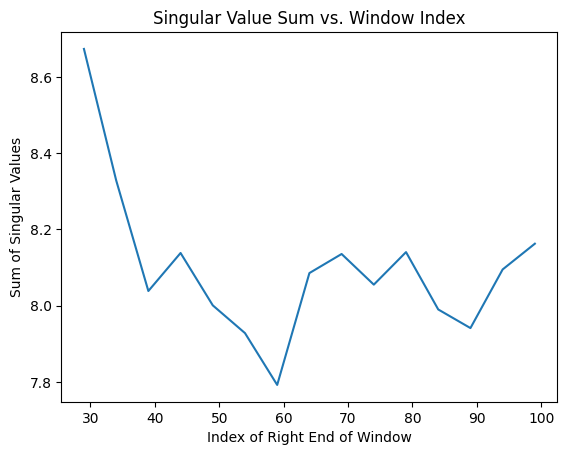

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.linalg import svd

# Create a sample dataframe
df = pd.DataFrame(np.random.rand(100, 3), columns=['A', 'B', 'C'])

window_length = 30
stride = 5

S = []
for i in range(0, len(df) - window_length + 1, stride):
    # Extract the window of data
    window = df.iloc[i:i+window_length, :]
    
    # Perform SVD on the window
    _, singular_values, _ = svd(window)
    
    # Calculate the sum of singular values
    sum_singular_values = np.sum(singular_values)
    
    # Append the sum to the S list
    S.append(sum_singular_values)

# Plot the values of S
plt.plot(range(window_length-1, len(df), stride), S)
plt.xlabel('Index of Right End of Window')
plt.ylabel('Sum of Singular Values')
plt.title('Singular Value Sum vs. Window Index')
plt.show()


In [24]:
import pandas as pd
import matplotlib.pyplot as plt

# Set the threshold for the anomaly score
threshold = 0.5

# Filter the DataFrame based on the threshold condition
filtered_df = df[df['anomaly_score'] > threshold].copy()

# Convert the 'timestamp' column to datetime
filtered_df['timestamp'] = pd.to_datetime(filtered_df['timestamp'])

# Set the 'timestamp' column as the DataFrame index
filtered_df.set_index('timestamp', inplace=True)

# Plotting variables
fig, ax = plt.subplots()

# Iterate over the filtered rows
for _, row in filtered_df.iterrows():
    # Plot the values of 'FC1' and 'FC2' for the current row
    ax.bar(['FC1', 'FC2'], row[['FC1', 'FC2']])
    
    # Define a time range to ignore the subsequent 48 hours of data
    ignore_range = pd.Timedelta(hours=48)
    
    # Filter the DataFrame to exclude the subsequent rows within the 48-hour time range
    filtered_df = filtered_df[filtered_df.index <= row.name + ignore_range]

# Display the plot
plt.show()


KeyError: 'anomaly_score'

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

# Set the threshold for the anomaly score
threshold = 0.5

# Filter the DataFrame based on the threshold condition
filtered_df = df[df['anomaly_score'] > threshold].copy()

# Convert the 'timestamp' column to datetime
filtered_df['timestamp'] = pd.to_datetime(filtered_df['timestamp'])

# Set the 'timestamp' column as the DataFrame index
filtered_df.set_index('timestamp', inplace=True)

# Create a list to store the filtered rows
filtered_rows = []

# Iterate over the filtered rows
for _, row in filtered_df.iterrows():
    # Define a time range to ignore the subsequent 48 hours of data
    ignore_range = pd.Timedelta(hours=48)
    
    # Get the end time of the ignore range
    ignore_end_time = row.name + ignore_range
    
    # Filter the DataFrame to include only the current row and ignore subsequent rows within the 48-hour time range
    current_row = filtered_df.loc[(filtered_df.index >= row.name) & (filtered_df.index <= ignore_end_time)]
    
    # Add the current row to the filtered_rows list
    filtered_rows.append(current_row)
    
    # Update the DataFrame to exclude the subsequent rows within the 48-hour time range
    filtered_df = filtered_df[filtered_df.index > ignore_end_time]

# Iterate over the filtered rows list
for row in filtered_rows:
    # Create a new figure and axes for each bar chart
    fig, ax = plt.subplots()
    
    # Plot the values of 'FC1' and 'FC2' for the current row
    ax.bar(['FC1', 'FC2'], row[['FC1', 'FC2']])
    
    # Display the plot for the current row
    plt.show()


KeyError: 'anomaly_score'

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Set the threshold for the anomaly score
threshold = 0.5

# Filter the DataFrame based on the threshold condition
filtered_df = df[df['anomaly_score'] > threshold].copy()

# Convert the 'timestamp' column to datetime
filtered_df['timestamp'] = pd.to_datetime(filtered_df['timestamp'])

# Sort the DataFrame by the 'timestamp' column
filtered_df.sort_values('timestamp', inplace=True)

# Initialize the previous timestamp variable
prev_timestamp = None

# Iterate over the filtered rows
for _, row in filtered_df.iterrows():
    # Get the current timestamp
    current_timestamp = row['timestamp']
    
    # Check if there is at least a 2-day time difference from the previous plot
    if prev_timestamp is None or (current_timestamp - prev_timestamp).days >= 2:
        # Create a new figure and axes for each bar chart
        fig, ax = plt.subplots()
        
        # Plot the values of 'FC1' and 'FC2' for the current row
        ax.bar(['FC1', 'FC2'], row[['FC1', 'FC2']])
        
        # Set the title and labels for the plot
        ax.set_title('Anomaly Score: {:.2f}'.format(row['anomaly_score']))
        ax.set_xlabel('Feature')
        ax.set_ylabel('Value')
        
        # Display the plot
        plt.show()
        
        # Update the previous timestamp
        prev_timestamp = current_timestamp


NameError: name 'df' is not defined

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Generate some synthetic data for demonstration
np.random.seed(0)
X = np.sort(5 * np.random.rand(20, 1), axis=0)
y = np.sin(X).ravel() + np.random.normal(0, 0.1, X.shape[0])

# Check the number of data points
num_data_points = len(X)

if num_data_points < 5:
    # If fewer than 5 data points, fit with polynomial degree 2
    polynomial_degree = 2
    polynomial_features = PolynomialFeatures(degree=polynomial_degree)
    X_poly = polynomial_features.fit_transform(X)

    # Train a linear regression model
    model = LinearRegression()
    model.fit(X_poly, y)
    
    # Plot the original data and the fitted polynomial
    X_plot = np.linspace(0, 5, 100).reshape(-1, 1)
    X_plot_poly = polynomial_features.transform(X_plot)
    y_plot_pred = model.predict(X_plot_poly)
    
    plt.scatter(X, y, label='Original Data')
    plt.plot(X_plot, y_plot_pred, color='red', label=f'Polynomial (Degree {polynomial_degree})')
    plt.xlabel('X')
    plt.ylabel('y')
    plt.title('Polynomial Regression')
    plt.legend()
    plt.show()
    
    print(f"Fitted polynomial degree: {polynomial_degree}")

else:
    # If 5 or more data points, use cross-validation to select the optimal polynomial degree
    best_degree = None
    best_score = float('-inf')
    
    for degree in range(2, 5):
        # Create polynomial features
        polynomial_features = PolynomialFeatures(degree=degree)
        X_poly = polynomial_features.fit_transform(X)
        
        # Perform cross-validation
        model = LinearRegression()
        scores = cross_val_score(model, X_poly, y, cv=3, scoring='neg_mean_squared_error')
        
        # Calculate the mean cross-validation score
        mean_score = np.mean(scores)
        
        if mean_score > best_score:
            best_score = mean_score
            best_degree = degree
    
    # Train the model with the best polynomial degree
    polynomial_features = PolynomialFeatures(degree=best_degree)
    X_poly = polynomial_features.fit_transform(X)
    model = LinearRegression()
    model.fit(X_poly, y)
    
    # Plot the original data and the fitted polynomial
    X_plot = np.linspace(0, 5, 100).reshape(-1, 1)
    X_plot_poly = polynomial_features.transform(X_plot)
    y_plot_pred = model.predict(X_plot_poly)
    
    plt.scatter(X, y, label='Original Data')
    plt.plot(X_plot, y_plot_pred, color='red', label=f'Polynomial (Degree {best_degree})')
    plt.xlabel('X')
    plt.ylabel('y')
    plt.title('Polynomial Regression')
    plt.legend()
    plt.show()
    
    print(f"Optimal polynomial degree selected: {best_degree}")


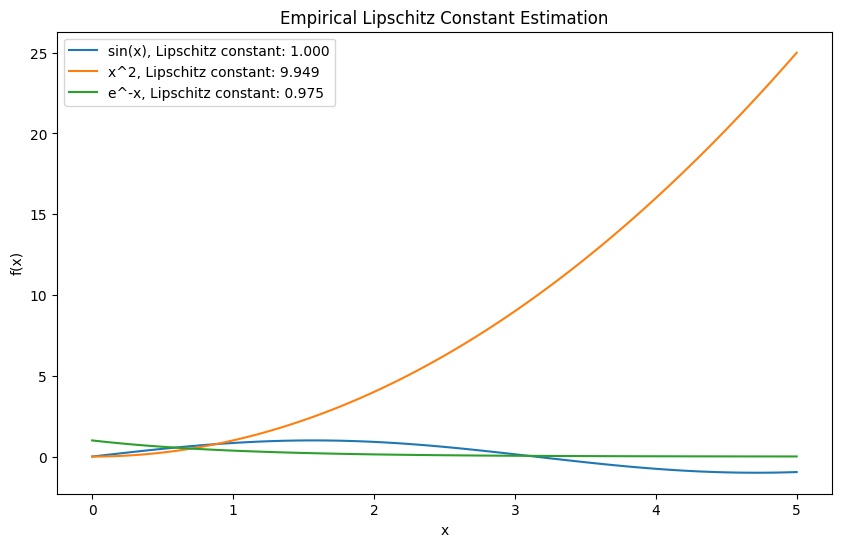

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Define functions
def function1(x):
    return np.sin(x)

def function2(x):
    return x ** 2

def function3(x):
    return np.exp(-x)

# List of functions and their names
functions = [(function1, 'sin(x)'), (function2, 'x^2'), (function3, 'e^-x')]

# Define the range of x values
x_range = np.linspace(0, 5, 100)

# Empirical Lipschitz constant estimation
def estimate_lipschitz_constant(func, x_range):
    slopes = []
    for i in range(len(x_range) - 1):
        slope = abs((func(x_range[i + 1]) - func(x_range[i])) / (x_range[i + 1] - x_range[i]))
        slopes.append(slope)
    return max(slopes)

# Calculate and plot Lipschitz constants for each function
plt.figure(figsize=(10, 6))
for func, name in functions:
    lipschitz_constant = estimate_lipschitz_constant(func, x_range)
    plt.plot(x_range, func(x_range), label=f'{name}, Lipschitz constant: {lipschitz_constant:.3f}')

plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Empirical Lipschitz Constant Estimation')
plt.legend()
plt.show()

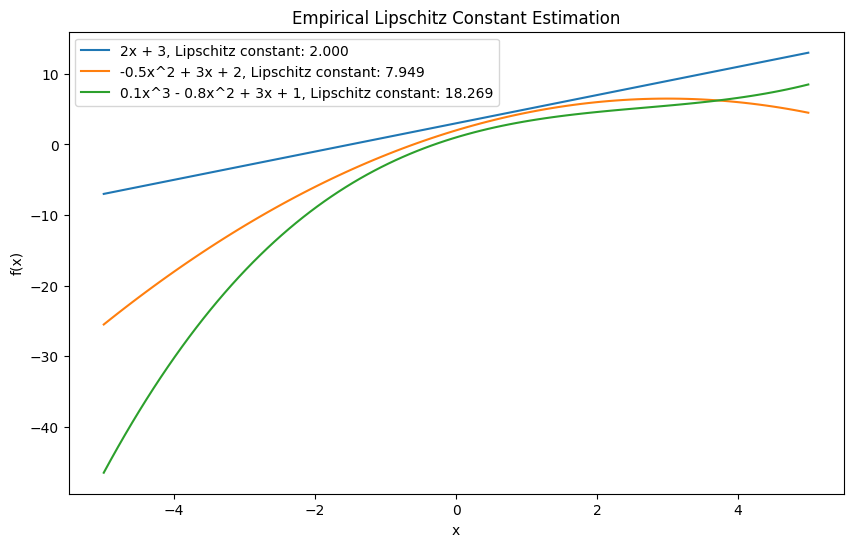

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Define linear, quadratic, and cubic polynomial functions
def linear_function(x):
    return 2 * x + 3

def quadratic_function(x):
    return -0.5 * x ** 2 + 3 * x + 2

def cubic_function(x):
    return 0.1 * x ** 3 - 0.8 * x ** 2 + 3 * x + 1

# List of functions and their names
functions = [(linear_function, '2x + 3'), (quadratic_function, '-0.5x^2 + 3x + 2'), (cubic_function, '0.1x^3 - 0.8x^2 + 3x + 1')]

# Define the range of x values
x_range = np.linspace(-5, 5, 100)

# Empirical Lipschitz constant estimation
def estimate_lipschitz_constant(func, x_range):
    slopes = []
    for i in range(len(x_range) - 1):
        slope = abs((func(x_range[i + 1]) - func(x_range[i])) / (x_range[i + 1] - x_range[i]))
        slopes.append(slope)
    return max(slopes)

# Calculate and plot Lipschitz constants for each function
plt.figure(figsize=(10, 6))
for func, name in functions:
    lipschitz_constant = estimate_lipschitz_constant(func, x_range)
    plt.plot(x_range, func(x_range), label=f'{name}, Lipschitz constant: {lipschitz_constant:.3f}')

plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Empirical Lipschitz Constant Estimation')
plt.legend()
plt.show()


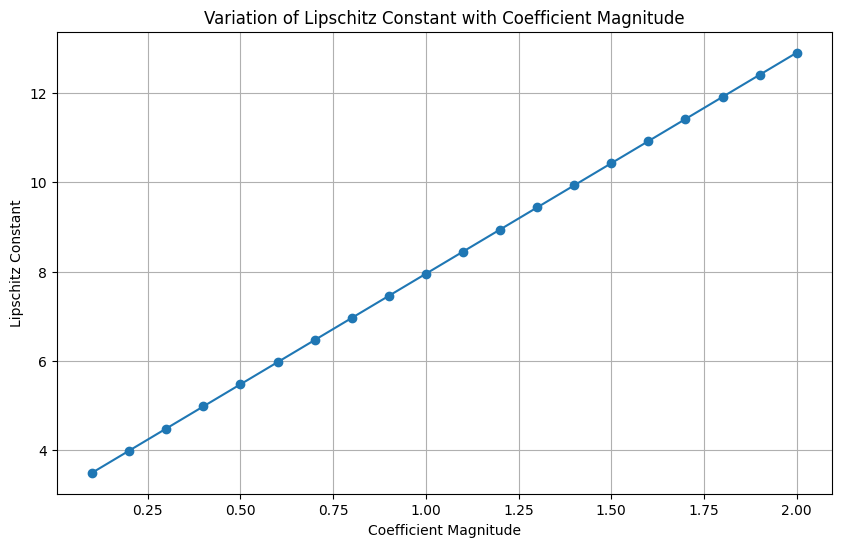

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Define the range of coefficient magnitudes
coefficient_magnitudes = np.linspace(0.1, 2.0, 20)

# Initialize lists to store coefficients and Lipschitz constants
coefficients = []
lipschitz_constants = []

# Empirical Lipschitz constant estimation
def estimate_lipschitz_constant(func, x_range):
    slopes = []
    for i in range(len(x_range) - 1):
        slope = abs((func(x_range[i + 1]) - func(x_range[i])) / (x_range[i + 1] - x_range[i]))
        slopes.append(slope)
    return max(slopes)

# Calculate Lipschitz constants for quadratic functions with increasing coefficients
for coefficient in coefficient_magnitudes:
    quadratic_function = lambda x: -0.5 * coefficient * x ** 2 + 3 * x + 2
    coefficients.append(coefficient)
    lipschitz_constants.append(estimate_lipschitz_constant(quadratic_function, x_range))

# Plot the variation of Lipschitz constant with coefficient magnitude
plt.figure(figsize=(10, 6))
plt.plot(coefficients, lipschitz_constants, marker='o')
plt.xlabel('Coefficient Magnitude')
plt.ylabel('Lipschitz Constant')
plt.title('Variation of Lipschitz Constant with Coefficient Magnitude')
plt.grid(True)
plt.show()


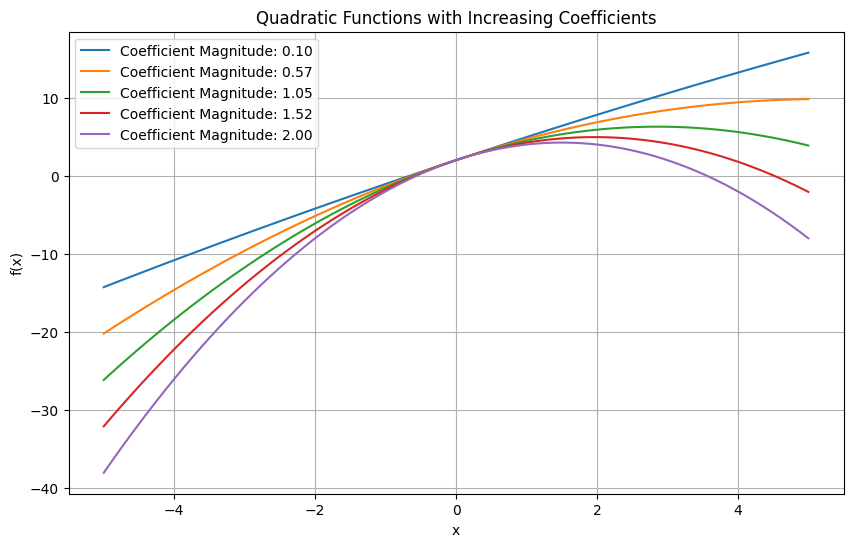

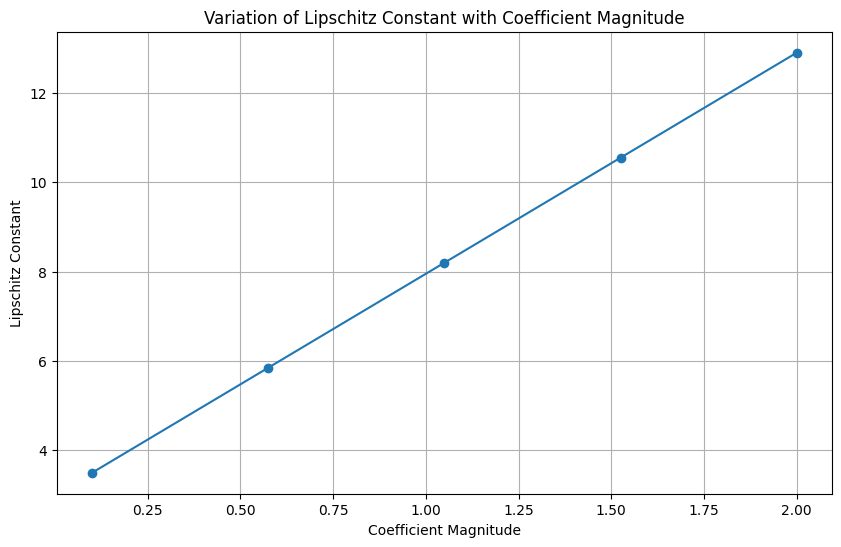

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Define the range of coefficient magnitudes
coefficient_magnitudes = np.linspace(0.1, 2.0, 5)

# Define the range of x values
x_range = np.linspace(-5, 5, 100)

# Initialize lists to store coefficients and Lipschitz constants
coefficients = []
lipschitz_constants = []

# Empirical Lipschitz constant estimation
def estimate_lipschitz_constant(func, x_range):
    slopes = []
    for i in range(len(x_range) - 1):
        slope = abs((func(x_range[i + 1]) - func(x_range[i])) / (x_range[i + 1] - x_range[i]))
        slopes.append(slope)
    return max(slopes)

# Calculate Lipschitz constants for quadratic functions with increasing coefficients
for coefficient in coefficient_magnitudes:
    quadratic_function = lambda x: -0.5 * coefficient * x ** 2 + 3 * x + 2
    coefficients.append(coefficient)
    lipschitz_constants.append(estimate_lipschitz_constant(quadratic_function, x_range))

# Plot the functions
plt.figure(figsize=(10, 6))
for coefficient in coefficient_magnitudes:
    quadratic_function = lambda x: -0.5 * coefficient * x ** 2 + 3 * x + 2
    plt.plot(x_range, quadratic_function(x_range), label=f'Coefficient Magnitude: {coefficient:.2f}')

plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Quadratic Functions with Increasing Coefficients')
plt.legend()
plt.grid(True)
plt.show()

# Plot the variation of Lipschitz constant with coefficient magnitude
plt.figure(figsize=(10, 6))
plt.plot(coefficients, lipschitz_constants, marker='o')
plt.xlabel('Coefficient Magnitude')
plt.ylabel('Empirical Lipschitz Constant')
plt.title('Variation of Lipschitz Constant with Coefficient Magnitude')
plt.grid(True)
plt.show()
